* Her adımın 2- sanie olması lazım. 
* 100 örnek alınacak
* standart sapma 5 ortalama 19

# Web sitesinde geçirilen sürenin testi
* web sitesinde geçirilen süre gerçekten 170 saniye mi?

In [6]:

import numpy as np
olcumler = np.random.randint(0,225,50)
olcumler[0:10]


array([ 64,  31,  90,  19,  33,   9,  36,  39, 182, 184])

In [7]:
import scipy.stats as stats

In [8]:
stats.describe(olcumler)

DescribeResult(nobs=50, minmax=(3, 219), mean=84.18, variance=4361.048571428572, skewness=0.5917052644986276, kurtosis=-0.8939123866281102)

In [11]:
# Varsaymlar
#Normallik varsayımı
import pandas as pd

<AxesSubplot: ylabel='Frequency'>

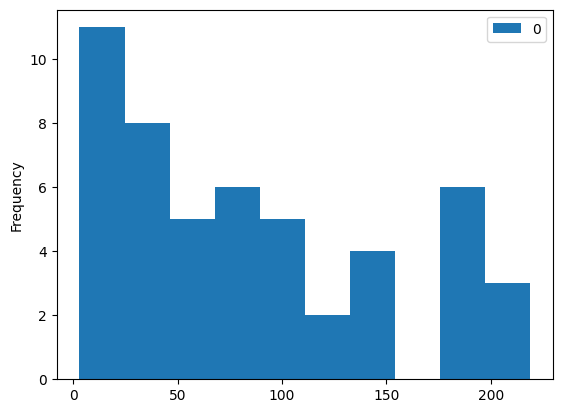

In [12]:
pd.DataFrame(olcumler).plot.hist()

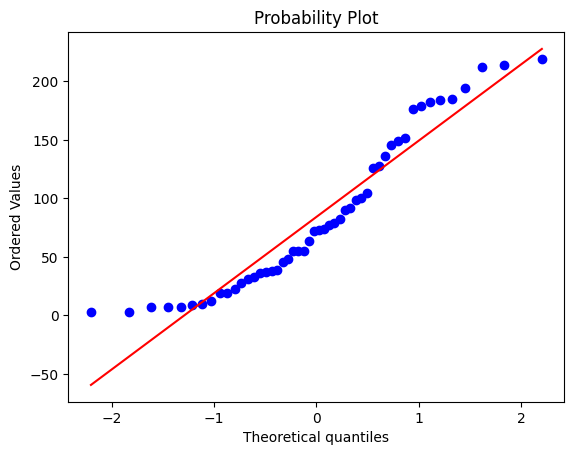

In [13]:
#qqplot
import pylab
stats.probplot(olcumler,dist="norm",plot=pylab)
pylab.show()

In [14]:
# Shapiro -Wilks Testi

H0: Örnek dağılım ile teorik normal dağılım arasında bir fark yoktur
H1: Vardır

In [15]:
from scipy.stats import shapiro
shapiro(olcumler)

ShapiroResult(statistic=0.9096828699111938, pvalue=0.001019403338432312)

In [16]:
# Hipotez testini uygulanması
stats.ttest_1samp(olcumler,popmean=170)

Ttest_1sampResult(statistic=-9.18920733399996, pvalue=3.085703258063031e-12)

H0: Websitesinde geçirilen ortalama süre 170 tir
H1: ...değildir.

# Nomparametrik tek örneklem testi

In [17]:
from statsmodels.stats.descriptivestats import sign_test

In [18]:
sign_test(olcumler,170)

(-16.0, 5.614100093254137e-06)

In [19]:
#Tek örneklem oran testi

Dönüşüm oranı ilgilenilen oranı / gören asyı gören kişi / alan kişi,

0.125 dönüşüm oranı elde edilmiş. 500 kişi tıklamış 40 kişi alışveriş yapmış 40/500 = 0,08

In [20]:

from statsmodels.stats.proportion import proportions_ztest
count = 40
nobs = 500
value = 0.125

proportions_ztest(count,nobs,value)

(-3.7090151628513017, 0.0002080669689845979)

# bağımsız iki örneklem t testi

In [21]:
A = pd.DataFrame(np.random.randint(0,30,20))

In [23]:
B = pd.DataFrame(np.random.randint(0,40,20))

In [25]:
A_B = pd.concat([A,B],axis=1)
A_B.columns = ["A","B"]
A_B.head()

,A,B
0,9,17
1,5,20
2,12,11
3,9,9
4,26,13


In [26]:
# normallik varsayımı

In [28]:
shapiro(A_B.A)

ShapiroResult(statistic=0.9123268723487854, pvalue=0.07059650868177414)

In [29]:
shapiro(A_B.B)

ShapiroResult(statistic=0.8827569484710693, pvalue=0.019839035347104073)

In [30]:
# Varyans homojenliğği varsayımı

In [31]:
stats.levene(A_B.A,A_B.B)

LeveneResult(statistic=0.4502132589121163, pvalue=0.506291948897821)

# Hipofez Testi

In [33]:
stats.ttest_ind(A_B["A"],A_B["B"],equal_var=True)

Ttest_indResult(statistic=0.28679759869300503, pvalue=0.7758253187196497)

# nonparametrik bağımsız iki örneklem testi

In [34]:
stats.mannwhitneyu(A_B.A,A_B.B)

MannwhitneyuResult(statistic=202.5, pvalue=0.9567864479759531)

# Bağımlı iki örneklem t testi

In [35]:
oncesi = pd.DataFrame(np.random.randint(115,125,30))

In [37]:
sonrasi = pd.DataFrame(np.random.randint(115,140,30))

In [38]:
oncesi[0:5]

,0
0,120
1,118
2,120
3,122
4,118


In [40]:
sonrasi[0:5]

,0
0,126
1,122
2,134
3,129
4,133


# Varsayım Kontrolleri

In [43]:
from scipy.stats import shapiro

In [44]:
shapiro(oncesi)

ShapiroResult(statistic=0.9198133945465088, pvalue=0.026523631066083908)

In [45]:
shapiro(sonrasi)

ShapiroResult(statistic=0.957821786403656, pvalue=0.2722153663635254)

ValueError: Samples must be one-dimensional.

In [48]:
# Hipotez Testi

# İki örneklem oran testi

In [49]:
from statsmodels.stats.proportion import proportions_ztest
import numpy as np

In [50]:
basari_sayisi  = np.array([300,250])
gozlem_sayilari = np.array([1000,1100])

In [51]:
proportions_ztest(count = basari_sayisi,nobs=gozlem_sayilari)

(3.7857863233209255, 0.0001532232957772221)

# Varyans Analizi

In [ ]:
# Varsayım kontrolü birden fazla grup vardır.


# Korelasyon

In [52]:
import seaborn as sns
tips = sns.load_dataset('tips')
df = tips.copy()
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [53]:
df["total_bill"] = df["total_bill"]-df["tip"]

In [54]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,15.98,1.01,Female,No,Sun,Dinner,2
1,8.68,1.66,Male,No,Sun,Dinner,3
2,17.51,3.50,Male,No,Sun,Dinner,3
3,20.37,3.31,Male,No,Sun,Dinner,2
4,20.98,3.61,Female,No,Sun,Dinner,4


<AxesSubplot: xlabel='tip', ylabel='total_bill'>

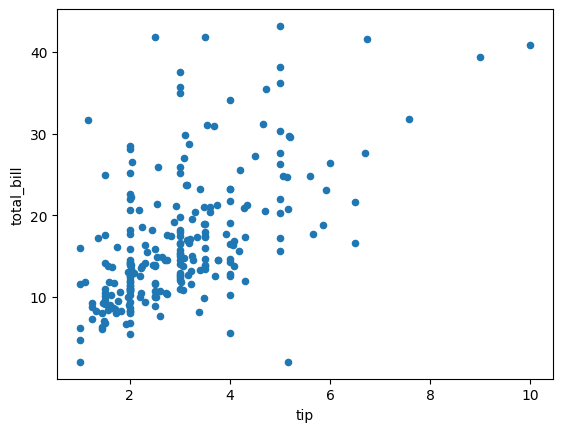

In [55]:
df.plot.scatter("tip","total_bill")

C:\Users\S_05_\AppData\Local\Temp\ipykernel_10780\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<AxesSubplot: >

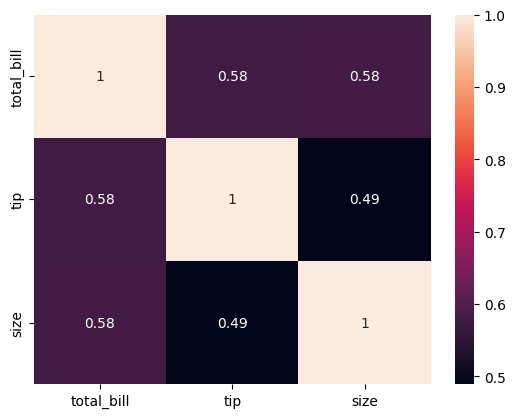

In [57]:
sns.heatmap(df.corr(),annot=True)

In [58]:
# Varsayım kontrolü

In [59]:
from scipy.stats import shapiro
shapiro(df["tip"])

ShapiroResult(statistic=0.8978114128112793, pvalue=8.200817629144819e-12)

In [60]:
shapiro(df["total_bill"])

ShapiroResult(statistic=0.9135653972625732, pvalue=1.1060685700670092e-10)

In [61]:
# Hipotez testi


In [62]:
# korelasyon Katsayıısı

In [65]:
df["tip"].corr(df["total_bill"],method="spearman")

0.593691939408997

In [66]:
#korelasyon anlamlımı

In [68]:
from scipy.stats.stats import pearsonr
pearsonr(df["tip"],df["total_bill"])

C:\Users\S_05_\AppData\Local\Temp\ipykernel_10780\3723057818.py:1: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.576663447109638, pvalue=5.018290084948562e-23)

In [71]:
# Nonparametrik hipotez testi
from scipy.stats import stats

In [73]:
stats.spearmanr(df["tip"],df["total_bill"])

C:\Users\S_05_\AppData\Local\Temp\ipykernel_10780\1170680036.py:1: DeprecationWarning: Please use `spearmanr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  stats.spearmanr(df["tip"],df["total_bill"])


SpearmanrResult(correlation=0.593691939408997, pvalue=1.2452285137560276e-24)